# 乳腺癌数据（机器学习中调参的基本思想）

## 1.导入需要的库

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 2.导入数据集，探索数据

In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.data.shape

(569, 30)

## 3.进行建模，看看调参前模型的准确率

In [5]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0)
score_pre = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
score_pre

0.9649122807017545

## 4.调参n_estimators

### 4.1.确定使模型达到最佳的n_estimators的值的大致范围

0.9649122807017545 111


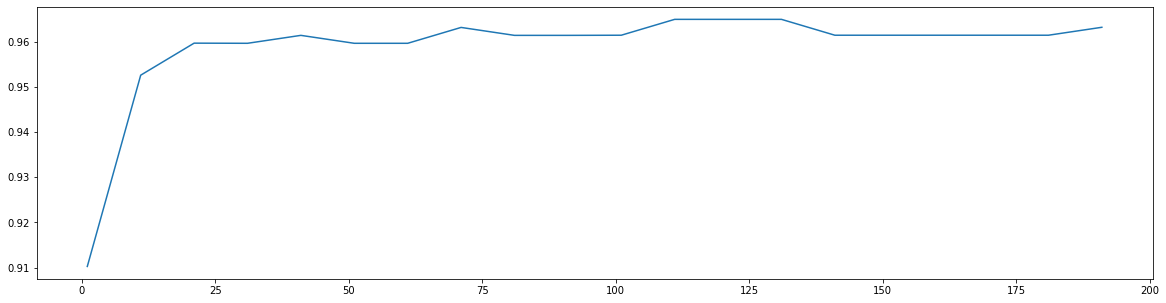

In [6]:
scorel = []

for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators = i+1, random_state = 0, n_jobs = -1)
    score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
    scorel.append(score)
    
print(max(scorel),scorel.index(max(scorel))*10+1)

plt.figure(figsize = (20,5))

plt.plot(range(1,201,10), scorel)

plt.show()

### 4.2.在确定的范围内，找到最佳的n_eatimators

0.9666666666666666 110


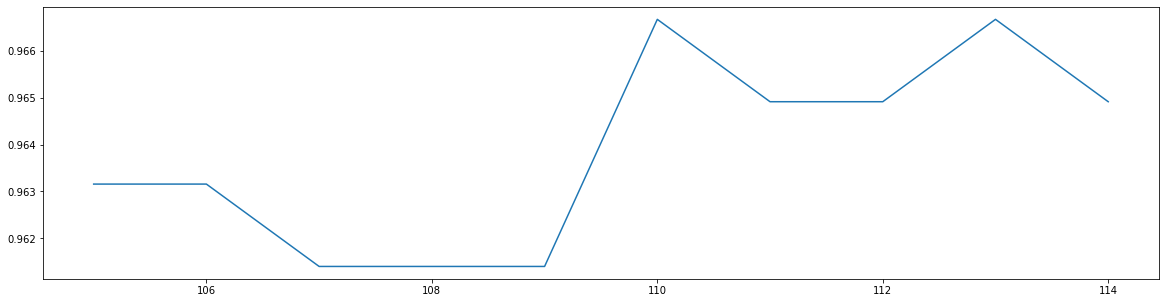

In [7]:
scorel = []

for i in range(105,115):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0, n_jobs = -1)
    score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
    scorel.append(score)
    
print(max(scorel), scorel.index(max(scorel))+105)

plt.figure(figsize = (20,5))

plt.plot(range(105,115), scorel)

plt.show()

## 5.调参max_depth

In [8]:
# 网格搜索参数
param_grid = {'max_depth':range(1,20)}

# 网格搜索
rfc = RandomForestClassifier(n_estimators = 110, random_state = 0)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=110, random_state=0),
             param_grid={'max_depth': range(1, 20)})

In [9]:
GS.best_params_

{'max_depth': 11}

In [10]:
# 调整后准确率变高，有效
GS.best_score_

0.9666666666666666

## 6.调参max_features

In [11]:
param_grid = {'max_features':np.arange(5,30)}

rfc = RandomForestClassifier(n_estimators = 110, random_state = 0)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=110, random_state=0),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [12]:
GS.best_params_

{'max_features': 7}

In [13]:
# 有效
GS.best_score_

0.968421052631579

## 7.调参min_samples_leaf

In [14]:
param_grid = {'min_samples_leaf':np.arange(1,11)}

rfc = RandomForestClassifier(n_estimators = 110, random_state = 0)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=110, random_state=0),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [15]:
GS.best_params_

{'min_samples_leaf': 1}

In [16]:
# 调整后准确率变低，不调
GS.best_score_

0.9666666666666666

## 8.调参min_sample_split

In [17]:
param_grid = {'min_samples_split':np.arange(2,22)}

rfc = RandomForestClassifier(n_estimators = 110, random_state = 0)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=110, random_state=0),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [18]:
GS.best_params_

{'min_samples_split': 2}

In [19]:
# 不调
GS.best_score_

0.9666666666666666

## 9.调参criterion

In [20]:
param_grid = {'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier(n_estimators = 110, random_state = 0)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=110, random_state=0),
             param_grid={'criterion': ['gini', 'entropy']})

In [21]:
# 两个系数没差别
GS.best_params_

{'criterion': 'entropy'}

In [22]:
# 不调
GS.best_score_

0.9683897243107771